In [1]:
import os
cache_dir = '/scratch3/workspace/wenlongzhao_umass_edu-reason/dev_kedar/transformers_cache'
os.environ['HF_HOME']=cache_dir
os.environ['HF_HUB_CACHE']=cache_dir+'/hub'

In [7]:
import gc
import torch
import pandas as pd
from tqdm import tqdm
from datasets import load_from_disk, load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM


In [3]:
model_name= "meta-llama/Llama-3.3-70B-Instruct"
hf_token=os.getenv('hf_token')

In [4]:
tokenizer = AutoTokenizer.from_pretrained(
        model_name,
        token=hf_token, 
        cache_dir=cache_dir
    )
tokenizer.pad_token_id = tokenizer.eos_token_id
device='cuda'
torch_dtype='bfloat16'
model = AutoModelForCausalLM.from_pretrained(
    model_name, 
    device_map="auto", 
    torch_dtype=torch_dtype,
    token=hf_token, 
    cache_dir=cache_dir
)
model.eval()

Could not cache non-existence of file. Will ignore error and continue. Error: [Errno 13] Permission denied: '/scratch3/workspace/wenlongzhao_umass_edu-reason/dev_kedar/transformers_cache/models--meta-llama--Llama-3.3-70B-Instruct/.no_exist/6f6073b423013f6a7d4d9f39144961bfbfbc386b/adapter_config.json'
Loading checkpoint shards: 100%|██████████| 30/30 [05:30<00:00, 11.03s/it]


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 8192)
    (layers): ModuleList(
      (0-79): 80 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=8192, out_features=8192, bias=False)
          (k_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (v_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (o_proj): Linear(in_features=8192, out_features=8192, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (up_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (down_proj): Linear(in_features=28672, out_features=8192, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((8192,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((8192,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((8192,), eps=1e-05)
    (rotary_

In [18]:
data_path='../outputs/exp-2.1.1/eval_1/logprobs1.json'
# data=load_dataset('json', data_files=data_path)['train']
data=pd.read_json(data_path)
data.head()

,prompt,gt_reasoning,gt_answer,student_token_ids,student_reasoning,student_answer,student_correctness,student_log_probs,teacher_log_probs,teacher_correctness
0,<|begin_of_text|><|start_header_id|>system<|en...,The volume of the box is 8 x 10 x 12 = <<8*10*...,40,"[1271, 1505, 704, 1268, 1690, 4857, 10215, 649...",To find out how many building blocks can fit i...,4,1,"[-4.506111145019532e-05, -0.130859375, -0.1425...","[0.0, -0.318359375, -0.126953125, 0.0, 0.0, -0...",1
1,<|begin_of_text|><|start_header_id|>system<|en...,The cost Rachel should budget for her pair of ...,500,"[1271, 1505, 704, 1268, 1790, 32532, 1288, 819...","To find out how much Rachel should budget, we ...",5,1,"[-0.0031585693359370004, -0.63671875, -0.07177...","[-2.384185791015625e-07, -0.48828125, -0.00070...",1
2,<|begin_of_text|><|start_header_id|>system<|en...,Jackson used 20 x 1/4 = <<20*1/4=5>>5 kilogram...,12,"[1271, 1505, 704, 1268, 1690, 85402, 315, 1333...",To find out how many kilograms of meat are lef...,1,1,"[-0.0185546875, -0.349609375, -0.38671875, -0....","[-0.0007591247558590001, -0.2255859375, -0.160...",1
3,<|begin_of_text|><|start_header_id|>system<|en...,"There are 35 people in Annie's class, which me...",8,"[1271, 11886, 420, 3575, 11, 584, 1205, 311, 1...","To solve this problem, we need to find out how...",6,0,"[-0.05029296875, -0.5859375, -0.0888671875, -0...","[-0.00038337707519500003, -1.8671875, -0.12695...",1
4,<|begin_of_text|><|start_header_id|>system<|en...,Hans’s party includes 12 - 2 = <<12-2=10>>10 a...,52,"[1271, 1505, 279, 2860, 16946, 3392, 11, 584, ...","To find the total deposit amount, we need to c...",5,1,"[-0.0263671875, -0.56640625, -0.126953125, -0....","[-0.00021076202392500003, -0.51171875, -0.8242...",1


In [19]:
data=data[data['teacher_correctness']==1]
data=data[data['student_correctness']==0]
data.head()

,prompt,gt_reasoning,gt_answer,student_token_ids,student_reasoning,student_answer,student_correctness,student_log_probs,teacher_log_probs,teacher_correctness
3,<|begin_of_text|><|start_header_id|>system<|en...,"There are 35 people in Annie's class, which me...",8,"[1271, 11886, 420, 3575, 11, 584, 1205, 311, 1...","To solve this problem, we need to find out how...",6,0,"[-0.05029296875, -0.5859375, -0.0888671875, -0...","[-0.00038337707519500003, -1.8671875, -0.12695...",1
10,<|begin_of_text|><|start_header_id|>system<|en...,"A red ticket is equal to 10 blue tickets, and ...",163,"[1271, 1505, 704, 1268, 1690, 810, 6437, 14741...",To find out how many more blue tickets Tom nee...,2,0,"[-0.037109375, -1.03125, -0.2265625, -0.001350...","[-0.0009117126464840001, -7.09375, -0.03808593...",1
28,<|begin_of_text|><|start_header_id|>system<|en...,The items he returned were valued at $700 + $5...,2020,"[1271, 11886, 420, 3575, 11, 1095, 596, 1464, ...","To solve this problem, let's break it down ste...",1,0,"[-0.078125, -0.53125, -0.10205078125, -0.00193...","[-0.041259765625, -1.8125, -0.00860595703125, ...",1
41,<|begin_of_text|><|start_header_id|>system<|en...,First find the distance between soccer practic...,5,"[1271, 1505, 279, 2860, 6138, 94870, 3966, 311...",To find the total distance Carla needs to driv...,8,0,"[-0.01043701171875, -0.7812500000000001, -0.34...","[-2.622604370117187e-06, -0.3984375, -1.703125...",1
43,<|begin_of_text|><|start_header_id|>system<|en...,The price of potatoes is 6 * 2 = $<<6*2=12>>12...,426,"[1271, 1505, 11291, 596, 9861, 3300, 11, 584, ...","To find Peter's remaining money, we need to ca...",N,0,"[-0.01177978515625, -0.1298828125, -0.44140625...","[-7.963180541992189e-05, -0.0247802734375, -0....",1


In [20]:
data.shape

(71, 10)

In [27]:
print(data.iloc[0]['prompt'])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 10 Mar 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

Given the following problem, reason and give a final answer to the problem.
Problem: Annie goes to school. Today is her birthday, so Annie decided to buy some sweets for her colleagues. Every classmate got 2 candies. In the end, Annie got left with 12 candies. If there are 35 people in Annie's class in total, how much did Annie spend on candies, if one candy costs $0.1?
Your response should end with "The final answer is [answer]" where [answer] is the response to the problem.<|eot_id|><|start_header_id|>assistant<|end_header_id|>




In [26]:
print(data.iloc[0]['student_reasoning'])

To solve this problem, we need to find out how many candies Annie gave to her classmates. We know that Annie got left with 12 candies and that she had some candies initially. Since we don't know the initial number of candies, let's call it x.

We know that every classmate got 2 candies, and there are 35 people in Annie's class in total. So, the number of classmates is 35 - 1 (Annie herself) = 34.

Since each classmate got 2 candies, the total number of candies given out is 34 * 2 = 68.

We know that Annie got left with 12 candies, so the initial number of candies is 68 + 12 = 80.

Now, we know that Annie had 80 candies initially and gave out 68 candies. To find out how much she spent, we need to multiply the number of candies by the cost of each candy.

Cost of each candy = $0.1
Number of candies given out = 68

Total cost = Number of candies given out * Cost of each candy
Total cost = 68 * $0.1
Total cost = $6.8

The final answer is $6.8.


In [63]:
import numpy as np

x=[tokenizer.decode(tok) for tok in data.iloc[0]['student_token_ids']]
y=np.exp(np.subtract(
    np.array(data.iloc[0]['teacher_log_probs']),
    np.array(data.iloc[0]['student_log_probs']),
)).tolist()
           
# xlabel

In [ ]:
exp(logp1-logp2)=exp(log(p1/p2))=p

In [68]:
print(y)

[1.0511760570131143, 0.27768997095379, 0.9626302113026797, 0.9998703087036115, 1.0000005960466254, 1.1863702521740984, 0.5901705299683179, 1.0000064373223552, 0.8161762130223398, 1.1058002137265759, 1.0441233195671145, 1.0010367041514114, 1.029997396340985, 1.0217168258872555, 0.00016413131488687607, 0.4551585883204129, 1.0003605538755298, 1.1300404380498243, 0.3855343441745787, 0.7259221509524083, 1.029478881969126, 1.0282857202546294, 0.11132376739130573, 0.004853161163813102, 1.1543644342352737, 1.0000038147045416, 1.0000056028523048, 1.0000598448539864, 1.0000576989606635, 0.9140739981758945, 0.227531008222499, 0.0392312659239061, 0.0022746308579195173, 0.5742516868118521, 0.1563796225438241, 0.8114079137930161, 1.03983547133623, 0.5522524501630204, 0.013933803286390808, 0.6953908273230813, 1.0000145436390828, 1.0060286318732523, 1.0217168258872555, 1.0039138893383477, 1.2790194759970974, 1.0077969628667027, 1.0001944492540622, 0.9366649036953589, 1.2567331614341362, 1.000028133788

In [45]:
print(x)

['To', ' solve', ' this', ' problem', ',', ' we', ' need', ' to', ' find', ' out', ' how', ' many', ' candies', ' Annie', ' gave', ' to', ' her', ' classmates', '.', ' We', ' know', ' that', ' Annie', ' got', ' left', ' with', ' ', '12', ' candies', ' and', ' that', ' she', ' had', ' some', ' candies', ' initially', '.', ' Since', ' we', ' don', "'t", ' know', ' the', ' initial', ' number', ' of', ' candies', ',', ' let', "'s", ' call', ' it', ' x', '.\n\n', 'We', ' know', ' that', ' every', ' class', 'mate', ' got', ' ', '2', ' candies', ',', ' and', ' there', ' are', ' ', '35', ' people', ' in', ' Annie', "'s", ' class', ' in', ' total', '.', ' So', ',', ' the', ' number', ' of', ' classmates', ' is', ' ', '35', ' -', ' ', '1', ' (', 'An', 'nie', ' herself', ')', ' =', ' ', '34', '.\n\n', 'Since', ' each', ' class', 'mate', ' got', ' ', '2', ' candies', ',', ' the', ' total', ' number', ' of', ' candies', ' given', ' out', ' is', ' ', '34', ' *', ' ', '2', ' =', ' ', '68', '.\n\n', '

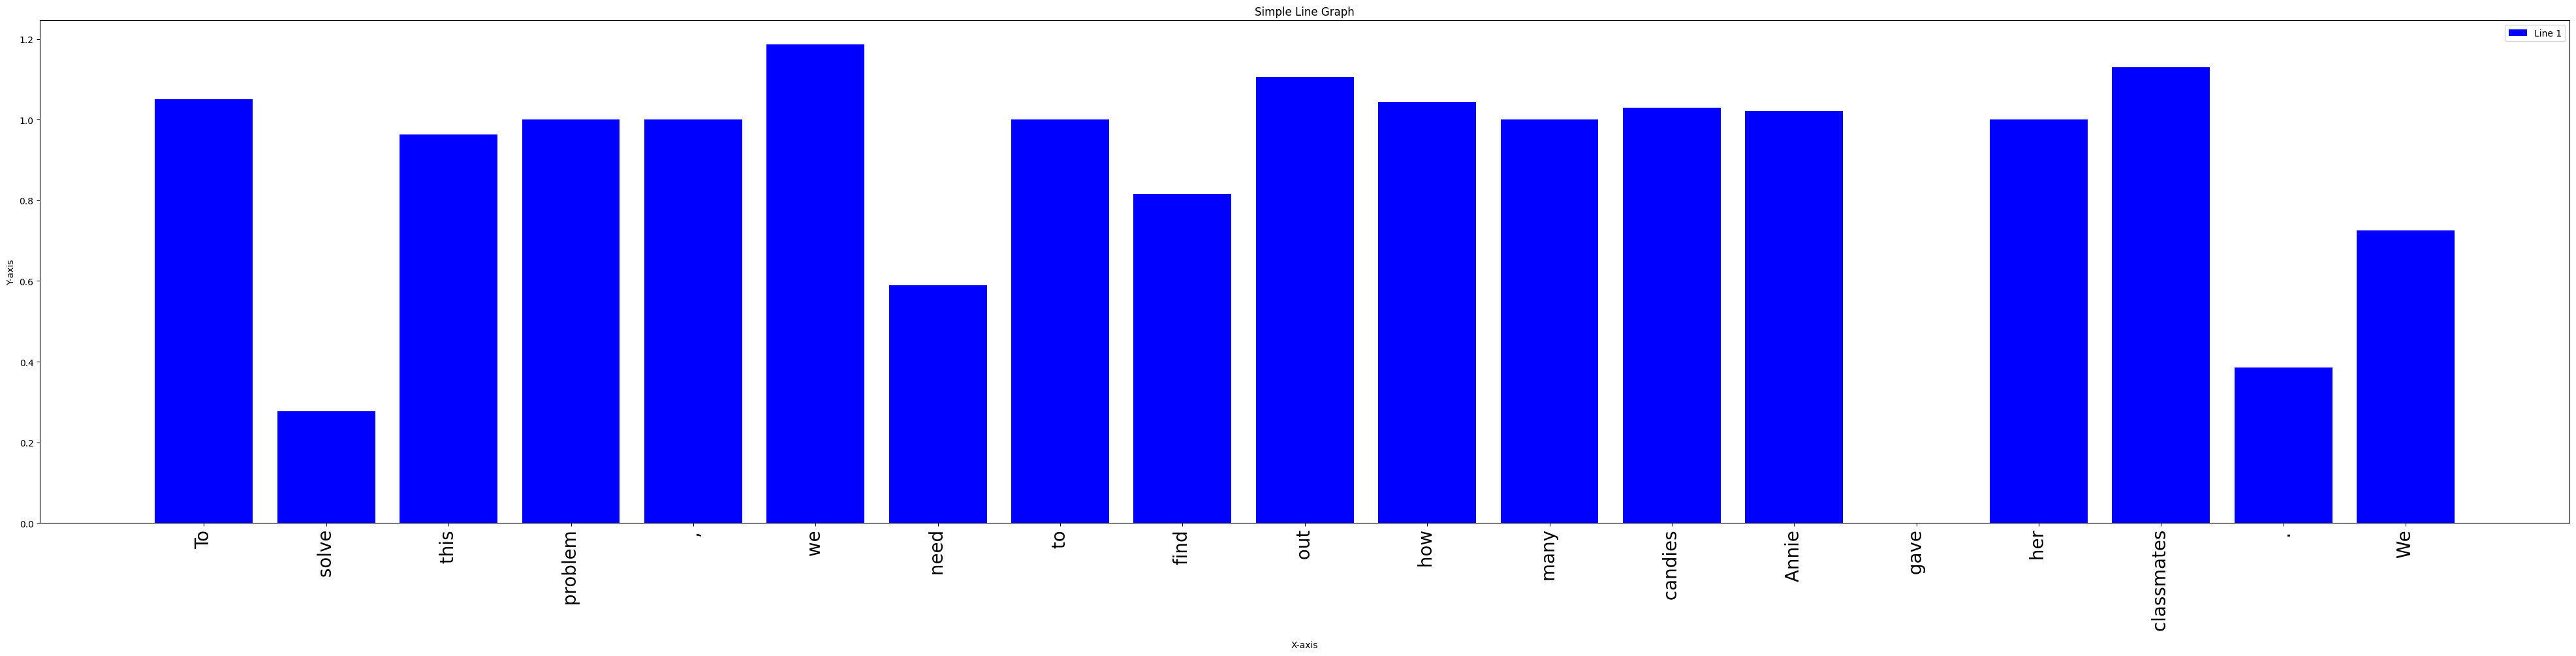

In [98]:
import matplotlib.pyplot as plt

%matplotlib inline

# Create the plot
plt.figure(figsize=(50, 10))
plt.bar(x[0:20], y[0:20], color='b', label='Line 1')


# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks(rotation=90,fontsize=20)
plt.title('Simple Line Graph')
plt.legend()

# Show the plot
plt.show()

In [103]:
# import numpy as np
# from IPython.display import display, HTML

# # Generate random data for histogram
# data = np.random.randn(1000)  # 1000 random data points from a normal distribution

# # Save data in a format that can be read by JavaScript
# js_data = str(data.tolist())  # Convert data to list and string for JS compatibility

# # Embed the D3.js code in an HTML template
# html_code = f"""
# <!DOCTYPE html>
# <html lang="en">
# <head>
#     <meta charset="UTF-8">
#     <meta name="viewport" content="width=device-width, initial-scale=1.0">
#     <title>Histogram with D3.js</title>
#     <script src="https://d3js.org/d3.v7.min.js"></script>
# </head>
# <body>
#     <svg width="800" height="400"></svg>
#     <script>
#         const data = {js_data};  // Pass Python data to JavaScript
        
#         const margin = {top: 20, right: 30, bottom: 40, left: 40};
#         const width = 800 - margin.left - margin.right;
#         const height = 400 - margin.top - margin.bottom;

#         const svg = d3.select("svg")
#             .append("g")
#             .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

#         const x = d3.scaleLinear()
#             .domain([d3.min(data), d3.max(data)])
#             .range([0, width]);

#         const bins = d3.histogram()
#             .domain(x.domain())
#             .thresholds(x.ticks(30))(data);  // Create bins based on data

#         const y = d3.scaleLinear()
#             .domain([0, d3.max(bins, d => d.length)])
#             .range([height, 0]);

#         svg.selectAll(".bar")
#             .data(bins)
#             .enter().append("rect")
#             .attr("class", "bar")
#             .attr("x", d => x(d.x0))
#             .attr("y", d => y(d.length))
#             .attr("width", d => x(d.x1) - x(d.x0) - 1)  // Set bar width
#             .attr("height", d => height - y(d.length))
#             .style("fill", "skyblue");

#         svg.append("g")
#             .attr("class", "x-axis")
#             .attr("transform", "translate(0," + height + ")")
#             .call(d3.axisBottom(x));

#         svg.append("g")
#             .attr("class", "y-axis")
#             .call(d3.axisLeft(y));
#     </script>
# </body>
# </html>
# """

# # Display the HTML with D3.js histogram in Jupyter Notebook
# display(HTML(html_code))


In [ ]:
prompt=''
tokenized_prompt=tokenizer(prompt, return_tensor='pt')

In [ ]:
model.generate(**tokenized_prompt)